<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2024)</h3>
    <hr>
    <h1>Lab 4: Optimization</h1>
    <h3>October 7, 2024</h3>
</center>




# Introduction
In this lab, we will be using optimization to solve several decision-making problems. The two main problem classes we will work with are **knapsack problems** and **portfolio optimization** problems. Both problems are widely applicable.

Knapsack problems --> linear and integer programming problems

Portfolio optimization --> a quadratic programming problem.



## Optimization
Optimization, as it is studied within the field of operations research (OR), is an example of prescriptive analytics. Instead of making predictions, you are prescribing a best course of action for a given decision-making problem.

An optimization problem is described by a vector $\bf{x}$ modeling decision variables, an objective function $f(\bf{x})$ to optimize, and a feasible set $\mathcal{X}$ for which $\bf{x}$ must belong to, i.e., $\bf{x} \in \mathcal{X}$. The optimization problem is:

1. A linear program (LP) when $\bf{x}$ is made up of continuous variables, $\mathcal{X}$ is made up of linear constraints, and the objective function is linear in $\bf{x}$, i.e., $f(\bf{x}) = \bf{c}^\top \bf{x}$.

2. An integer program (IP) if $\bf{x}$ includes integer variables.

3. A quadratic program (QP) if the objective function $f(\bf{x})$ is quadratic in $\bf{x}$, i.e., $f(\bf{x}) = \bf{x}^\top\bf{Q} \bf{x}$ (where $\bf{Q}$ is a real symmetric matrix).

LPs are easy to solve, and can be solved in polynomial time. On the other hand, IPs are generally difficult to solve, and are $\mathcal{NP}$-hard problems. QPs are somewhere in between, some are easy to solve and some are hard to solve. You have already been solving QPs in this course! The least squares method (from linear and logistic regression) is a QP, since you are minimizing the *squared* residual errors.


To begin this lab, let us first import the essential tools. We will be using a solver called CVXPY to solve all our optimization problems. If you would like more practice, or would like to see how cvxpy can be used to solve more complicated optimization problems than those presented in this lab, please visit the [website](https://www.cvxpy.org/) where there are lots of resources and example codes. There are many other open-source solvers and packages available (e.g., [OR-Tools](https://developers.google.com/optimization/introduction/overview), [PuLP](https://coin-or.github.io/pulp/)) that are more powerful than CVXPY, however, CVXPY has more friendly syntax.

In [ ]:
!pip install cvxpy

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp

# Extra package for scraping data (details not covered in course)
import datetime

# Knapsack Problems

The first problem we will study is called the Knapsack Problem. The general idea is as follows. You have a knapsack with some capacity and you want to put a set of items into it. You generally cannot fit all of the items into the knapsack, so you have to decide which items to pack. Each item has a weight and a value, and you want to find the subset of items of maximum total value such that its total weight does not exceed the capacity.

The knapsack problem is an integer programming problem --> the variables take on binary values: you either pick an item or you don't.

Mathematically, the knapsack problem is as follows:


\begin{align*}
        \max_{\bf{x}} \quad    & \sum_{j=1}^n v_j x_j \\
        s.t. \quad           & \sum_{j=1}^n w_{j} x_j \leq C, \\
		\quad & x_j \in \{0,1\},  \quad \forall j \in \{1,\dots,n\}.
\end{align*}

In the above formulation $v_j$ represents the value of item $j$, $x_j$ is our decision variable representing whether or not we put item $j$ in the knapsack, $w_j$ is the weight of item $j$, and $C$ is the capacity of our knapsack. The first constraint ensures the total weight of our items does not exceed the knapsack, and it is called a *knapsack constraint*.

In certain problems, we may want to consider *fractional knapsack problems*, which is simply the formulation above without the integrality constraints, i.e., the vector $\bf{x}$ is continuous and can include any values between 0 and 1. The fractional knapsack problem is an LP, whereas the general knapsack problem is an IP.



##Application

Many problems can be formulated as knapsack problems. Below we present an application of building an itinerary.

Katie is visiting Toronto. She has **8 hours** to explore the city and wants to make the most use of her time. She has marked a total of 10 places/attractions that she would like to visit in her guidebook. Furthermore, the guidebook provides a suggestion for the amount of time to spend at each attraction. For any place she visits, Katie plans to spend the amount of time suggested by the guidebook. She prefers some attractions more than others. Suppose her preference for each attraction is described using a **utility** score between 0-1.

We use the following dictionary to define the 10 sites, their scores and the estimated time that Katie should spend at each site.


In [ ]:
# Initialize dictionary of scores and estimated times
K_dict = {'CN Tower': [0.8, 2], 'ROM': [0.43,3], 'AGO': [ 0.56, 2.5], 'UofT': [0.46,1.5], 'K. Market': [0.4,1],
          'Casa Loma': [0.6, 1.5], 'Ripleys': [0.75,2.5], 'High Park': [0.68, 2], 'NP Square': [0.42, 1], 'Island': [0.71,2.5]}

# Convert dictionary to DataFrame
df = pd.DataFrame(K_dict, index = ['utility', 'time'])
df.head()



,CN Tower,ROM,AGO,UofT,K. Market,Casa Loma,Ripleys,High Park,NP Square,Island
utility,0.8,0.43,0.56,0.46,0.4,0.6,0.75,0.68,0.42,0.71
time,2.0,3.00,2.50,1.50,1.0,1.5,2.50,2.00,1.00,2.50


### Exercises


Suppose Katie started adding destinations to her itinerary in a *greedy* manner, which means she begins by adding the location giving her the highest utility, followed by the location with the second highest utility and so on, until she can't fit anymore destinations into her itinerary.

Question 1: What would her *greedy-optimal* itinerary look like?



___

**Question 1 Answer:** Cn Tower - 2, Ripleys - 2.5, Island - 2.5, NP Square - 1

___

Question 2: How much total utility would it give her?

___

**Question 2 Answer:** 0.8 + 0.75 + 0.71 + 0.42 = 2.68

___


Question 3: Does she have any free time?


___

**Question 3 Answer:** she has no free time

___

Question 4: While you can compute this solution by hand, can you write code (hint: use a for/while loop) to compute this greedy solution?

In [ ]:
# Write your code here

# Step 1: Sort items based on value[0] (utility) in descending order
sorted_items = sorted(K_dict.items(), key=lambda item: item[1][0], reverse=True)

# Step 2: Initialize variables for the greedy selection
selected_items = []
utility_sum = 0  # This will track the sum of value[0]
time_sum = 0  # This will track the sum of value[1]
max_constraint = 8  # Maximum allowed sum of value[1] (time in hours)

# Step 3: Greedily select items
for key, value in sorted_items:
    # Check if adding the current item's time exceeds the max_constraint
    if time_sum + value[1] <= max_constraint:
        selected_items.append((key, value))
        utility_sum += value[0]  # Add value[0] to the utility sum
        time_sum += value[1]  # Add value[1] to the time sum

# Output the results
print("Selected items:", selected_items)
print("Total utility_sum (value[0]):", utility_sum)
print("Total time (value[1]):", time_sum)

'''
When constructed in a greedy fashion, Katie's itinerary is:
 ['CN Tower', 'Ripleys', 'Island', 'NP Square'].
This itinerary gives her a total utility of: 2.6799999999999997.
She has a total of 0.0 hour(s) that did not get used.
'''

Selected items: [('CN Tower', [0.8, 2]), ('Ripleys', [0.75, 2.5]), ('Island', [0.71, 2.5]), ('NP Square', [0.42, 1])]
Total utility_sum (value[0]): 2.6799999999999997
Total time (value[1]): 8.0


"\nWhen constructed in a greedy fashion, Katie's itinerary is:\n ['CN Tower', 'Ripleys', 'Island', 'NP Square'].\nThis itinerary gives her a total utility of: 2.6799999999999997.\nShe has a total of 0.0 hour(s) that did not get used.\n"

In [ ]:
# Write your code here

# -------------------
most_util = []
dict_copy = K_dict.copy()
most = ''
time = 8
util = 0
total_util = 0

while time > 0:
    for i in dict_copy:
        if dict_copy[i][0]>util:
            most=i
            util = dict_copy[i][0]
    #print(dict_copy[most])
    if time-dict_copy[most][1] >= 0:
        time -= dict_copy[most][1]
        most_util.append(most)
        total_util += dict_copy[most][0]
    del dict_copy[most]
    util=0

print(f"When constructed in a greedy fashion, Katie's itinerary is:\n{most_util}")
print(f"This itinerary gives her a total utility of: {total_util}")
print(f"She has a total of {time} hour(s) that did not get used.")

Question 5: Do you think this is a good approach to constructing an itinerary? Why or why not?

___

**Question 5 Answer:** I think this is a decent method because it gets the most important places which is important to the user while staying in the time constraint provided by the user


___

## Coding the optimization model

We will define a knapsack problem according to the problem description above and use `cvxpy` to formulate and solve this problem.

We'll start with the variables. **To define a variable or a set of variables, we use the function** `cp.Variable()`.

If you input a number, the function will create a *set* of variables as shown below.  By default a variable is continuous, but you can use the parameters (`boolean = True`) or (`integer = True`) to create binary or integer variables, respectively.

In [ ]:
num_locations = len(df.columns)   # number of possible sites to visit
# creates a set with args: size, data type
x = cp.Variable(num_locations,boolean=True)  # x is a vector of binary variables of size num_locations.

Next we'll define the objective function. Because we are **maximizing the total utility** that Katie wants to get out of her itinerary, we use the function `cp.Maximize()`, where we input the **objective function $\sum^n_{i =1} v_i x_i$.**

In [ ]:
utility_values = df.loc['utility']   # utility for each site
obj = cp.Maximize(x@utility_values)   # x@utility_values computes the dot product, i.e., multiplies utility of each site with the corresponding variable and computes sum.

Next, we will define the **constraints**. We begin by initializing an empty list of constraints, to which we can **append all of the constraints we want to define**. For now, we only consider the **single knapsack capacity constraint**.

In [ ]:
cons = [] #initialize constraint list

time_values = df.loc['time']  # cost coefficient for the knapsack constraint
cons.append(x@time_values <= 8)  # keep your total hours less than 8

Finally, we put the model together. **cp.Problem(objective, constraints)**

In [ ]:
prob = cp.Problem(obj,cons)

## Solving the model

Now that the variables, objective, and constraints are defined, we can solve the problem.

In [ ]:
 # verbose = True allows you to see the solution process
prob.solve(verbose=False)

print('The objective value is {}.'.format(obj.value))  # gives you the optimal objective value
# The objective value is 2.97.

The objective value is 2.97.


To extract the values of the variables, you can use the following code. The code is written compactly. Make sure to understand what each piece of the code is doing.

In [ ]:
#Extract the solution of the IP into a dataframe
x_np_array = x.value.astype(int)  # extract the x values as a np array
x_values = pd.Series(x_np_array, index = df.columns)  # convert the np array to a Dataframe
selected = x_values[x_values == 1].index.values  # get assignments

# Print outputs
print(x_values)
print(selected)

CN Tower     1
ROM          0
AGO          0
UofT         0
K. Market    1
Casa Loma    1
Ripleys      1
High Park    0
NP Square    1
Island       0
dtype: int64
['CN Tower' 'K. Market' 'Casa Loma' 'Ripleys' 'NP Square']


## Model Variant

Suppose Katie is traveling with her brother Chris, who would like to see UofT, and also does not want to visit more than 3 locations. The complete code with Chris's conditions is presented below:

In [ ]:
# Define variables
x_2 = cp.Variable(len(df.columns), boolean=True)
# Define objective
obj_2 = cp.Maximize(x_2@df.loc['utility'])

# Define constraints
cons_2 = []  # Initialize constraint list
cons_2.append(x_2@df.loc['time'] <= 8)  # time constraint
cons_2.append(x_2[list(df.columns).index('UofT')] >= 1)  # must visit UofT constraint
cons_2.append(cp.sum(x_2)<=3)  # must not visit more than 3 locations
prob_2 = cp.Problem(obj_2,cons_2) # put model tgt
prob_2.solve() # solve!

# 2.0100000000000002

2.0100000000000002

## Exercises


1. Suppose that Katie is traveling alone. If Katie wanted to visit at least one of the two museums (AGO or ROM), what constraint would we add into the model?






In [ ]:
# re-initialize data to ensure that dataframe is unaffected
K_dict = {'CN Tower': [0.8, 2], 'ROM': [0.43,3], 'AGO': [ 0.56, 2.5], 'UofT': [0.46,1.5], 'K. Market': [0.4,1],
          'Casa Loma': [0.6, 1.5], 'Ripleys': [0.75,2.5], 'High Park': [0.68, 2], 'NP Square': [0.42, 1], 'Island': [0.71,2.5]}

# Convert dictionary to DataFrame
df = pd.DataFrame(K_dict, index = ['utility', 'time'])

# define new binary vector (visited or not)
x_3 = cp.Variable(len(df.columns), boolean=True)

# Define objective
obj_3 = cp.Maximize(x_3@df.loc['utility'])

# Define constraints
cons_3 = []  # Initialize constraint list
cons_3.append(x_3@df.loc['time'] <= 8)  # time constraint

# Add constraint that at least one of AGO or ROM must be visited
ago_index = list(df.columns).index('AGO')
rom_index = list(df.columns).index('ROM')

# in the binary vector x, the sum of the ago index and rom index must be at least 1
cons_3.append(x_3[ago_index] + x_3[rom_index] >= 1)  # must visit AGO or ROM

prob_3 = cp.Problem(obj_3,cons_3) # put model tgt
prob_3.solve() # solve!

2.7800000000000002

2. Suppose again that Katie is traveling alone. We now consider the case where, for each destination, Katie is willing to spend *less* time that the guidebook suggests. Code up this fractional knapsack problem. Add the subscript "_lp" to names of variables, objective, constraints and the model, so that your code doesn't overlap with the models defined above. Hint: `x_lp >= 0` and `x_lp <= 1` together ensure that all of the variables are between 0 and 1.

 - 2a. What is her total utility?

total utility was 3.0533333286

 - 2b. How did her itinerary change?

she is now going to cn tower, uoft, kmarket, casaloma, high park, np square

 - 2c. What would we have to assume about Katie's utility function for this model to make sense? Hint: if Katie spends 50% of the estimated time at a location, how much utility would she get?

the amount of utility you get for each location is directly proportional to the amount of time spent at that location. ex. if she spend half the time at the location it will be half the utility


In [ ]:
# Question 2

# define new binary vector (visited or not)
x_lp = cp.Variable(len(df.columns), nonneg=True)

# Define objective
lp_obj = cp.Maximize(x_lp@df.loc['utility'])

# Define new constraints
cons_lp = []  # Initialize constraint list
cons_lp.append(x_lp@df.loc['time'] <= 8)  # time constraint
cons_lp.append(x_lp <= 1)
cons_lp.append(x_lp >= 0)

# create model and solve
prob_lp = cp.Problem(lp_obj,cons_lp) # put model tgt
prob_lp.solve() # solve!

total_utility = round(prob_lp.value, 10)
itinerary = pd.Series(x_lp.value, index = df.columns).round(2)

print("Total utility: ", total_utility)
print("Itinerary (fractions of time spent at each location):")
print(itinerary)


Total utility:  3.0533333286
Itinerary (fractions of time spent at each location):
CN Tower     1.00
ROM          0.00
AGO          0.00
UofT         0.33
K. Market    1.00
Casa Loma    1.00
Ripleys      0.00
High Park    1.00
NP Square    1.00
Island       0.00
dtype: float64


 3. Consider Katie's original problem, but now suppose that she has only 7.75 free hours. Do you expect the LP relaxation (i.e., the fractional knapsack problem in the previous question) to give lower, the same, or higher total utility? Why?

___

**Question 3 Answer:** The LP relaxation of moving to continuous from discrete values will give a lower utility because time is a tight bound to the utility she is able to get


___

#Portfolio Optimization

In this section, we will study another type of optimization problem, called portfolio optimization. The problem will be presented in the context of stock investing, although it can be applied to other settings (e.g., funding and investing in projects or medical research).

In porfolio optimization, we are given a set of assets, and we are trying to decide on an

***portfolio allocation vector* --> the fraction of our total wealth that we are investing in each asset.**

$n$ different assets, and we have to decide on a vector $\mathbf{x} = [x_1, x_2, \ldots , x_n]$ such that $\sum_{i = 1}^n x_i = 1$ and $x_i \geq 0 \ \forall i \in \{0,1,.\ldots,n\}$.

* sum of all fractions = 1 and all fractions are positive

**The objective --> invest in assets that have high *return* but low *risk*.**



## Model

We define the portfolio optimization problem below.


\begin{array}{ll} \underset{\bf{x}}{\mbox{maximize}} & \boldsymbol{\mu}^\top {\bf x} - \gamma {\bf x}^\top\Sigma {\bf x}\\
\mbox{subject to} & {\bf 1}^\top {\bf x = 1},\\
& \mathbf{x} \geq \mathbf{0}.
\end{array}

The vector of $\boldsymbol{\mu}$ = $[\mu_1, \mu_2, ... \mu_n]$ defines the ***expected return* of each stock.**
- given a \$100 dollar investment today in stock $i$ today, we expect to make \$100$\mu_i$ in the next period.
- want to maximize our total expected return : $\boldsymbol{\mu}^\top \bf{x}$.

We want to **minimize the *risk*** of the portfolio.

Risk is defined by the variance of the portfolio.
- higher the variance, the more likely you are to lose a lot of money.
- portfolio variance is defined by the variance of each individual stock in your portfolio as well as the co-variance between the stocks in your portfolio
- **Risk** :  ${\bf{x}}^\top \Sigma {\bf{x}}$,
  -  where $\Sigma$ denotes the covariance matrix of the stocks.
  - To **minimize risk**, we use the negative term $-{\bf{x}}^\top \Sigma {\bf{x}}$ in the objective function.

**Value of $\gamma \geq 0$ is the *risk aversion parameter***.
- helps decide how much emphasis we want to put on minimizing risk, which generally comes at a cost of lowering expected return.
- Ex. if we set $\gamma = 0$, then we would be building a portfolio without considering risk at all.
- We call the objective $\mu^T\mathbf{x} - \gamma \mathbf{x}^T\Sigma \mathbf{x}$ the *risk-adjusted return*.



## Return and Risk in Detail

In this section, we will elaborate a bit more on the ideas of expected return and risk. While you will not be expected to understand the math in detail, it should serve to give a better idea of portfolio optimization for those who are interested.

First, we discuss the topic of *expected* return. If we buy a stock at price $p_i$ and sell it at $p^*_i$ in the next period, we will make a return of $r_i = (p^*_i - p_i)/p_i$. At the time of buying stocks, however, we will not know exactly what the return of each stock will be. Nonetheless, we can estimate the *expected return* $\mathbb{E}[r_i]$, which is denoted by $\mu_i$. The first objective of portfolio optimization is to find a portfolio allocation vector $\mathbf{x}$ such that the expected return $\mathbb{E}[\mathbf{R}] = \sum^n_{i = 1} \mu_i x_i$ is maximized.

The second objective of portfolio optimization is to minimize the *risk* of the portfolio, which is represented by the *variance* of the portfolio $\mathbf{x}^\top \Sigma \mathbf{x}$, where $\Sigma$ represents the covariance matrix. In particular, portfolio optimization assumes that investors are *risk averse*. That is, for the same expected return, investors would prefer a portfolio with low variance (for example, where the expected return is guaranteed) rather than a portfolio with high variance (there's a chance you lose all your money).

The term $\mathbf{x}^\top \Sigma \mathbf{x}$ might look mysterious or complicated, but it easy to explain (and python packages will take care of the complicated operations :)). If we write out $\mathbf{x}^\top \Sigma \mathbf{x}$, we get $\sum _{i}x_{i}^{2}\sigma _{i}^{2}+\sum _{i}\sum _{j\neq i}x_{i}x_{j}\sigma _{i}\sigma _{j}\rho _{ij}$, where $\sigma_i$ is the standard deviation of a stock $i$ and $\rho_{ij}$ is the correlation coefficient between stock $i$ and $j$. The first term ($\sum _{i}x_{i}^{2}\sigma _{i}^{2}$) captures the *variance* of each stock, i.e., how volatile stock $i$ is. The second term ($\sum _{i}\sum _{j\neq i}x_{i}x_{j}\sigma _{i}\sigma _{j}\rho _{ij}$) captures the *co-variance* between stocks, i.e., how closely stock $i$ moves with respect to stock $j$. Naturally, we want to build a portfolio with stocks that have low volatility, as well as a diversified portfolio so that not all stocks follow the same trajectory.


### Exercise

1. Suppose $\bf{x}_1$ and $\bf{x}_2$ corresponds to two portolios built using $\gamma_1$ and $\gamma_2$, respectively. If $\gamma_1 > \gamma_2$, would I expect the variance of the portfolio $\bf{x}_1$ to be higher or lower than $\bf{x}_2$?



___

**Question 1 Answer:** Since we are more risk averse with gamma1 than gamma2, the variance of portfolio x_1 will be lower than that of portfolio x_2
___

## Getting Data

In this lab, we will assume that $\mu$ (mean) and $\Sigma$ (covariance) are the mean and covariance of the historical returns of assets, respectively.
- The following code will import daily stock prices from Yahoo Finance from Sept 1, 2019 to Sept 1, 2020 to calculate our $\mu$ and $\Sigma$.
- Because these are average daily returns, the numbers will appear quite small.
- We will only consider 30 (randomly) selected companies in the S&P 500 list. The code may take up to a minute to run.

Finally, note that you **do not** have to understand or reproduce the following code, you will not be tested on it. We included it here simply for your own interest.


In [ ]:
# First, we install the yfinance package, which is not on Colab by defualt.
!pip install -U yfinance

In [ ]:
import datetime  # Package for making dates

import yfinance as yf  # Great package for getting data from yahoo finance


In [ ]:
# datetime.datetime is a data type within the datetime module
start = datetime.datetime(2019, 9, 1)
end = datetime.datetime(2020, 9, 1)

# 30 pre-specified tickers from the S&P500 list.
tickers_list = ['KMX', 'CDW', 'VICI', 'NKE', 'RJF', 'ALK', 'MU', 'SRE', 'DOW',
                'DIS', 'SYY', 'IR', 'PODD', 'GE', 'ELV', 'MTB', 'VZ', 'FDS',
                'DG', 'AMGN', 'FTV', 'PRU', 'UNP', 'CMG', 'APTV', 'RMD', 'ALL',
                'PNW', 'CBRE', 'HLT']

# Load data from yahoo
df = yf.download(tickers_list, start, end)
daily_gains = (df.Close - df.Open) / df.Open

# Get close prices
average_return = daily_gains.mean()
covariance = daily_gains.cov()

# Print summary of data
print(average_return.head())
print(covariance.head())

# Estimate parameters for portfolio optimization model
mu = average_return.values    #convert dataframe to array
Sigma = covariance.values    #convert dataframe to matrix


[*********************100%***********************]  30 of 30 completed

Ticker
ALK    -0.003721
ALL     0.000036
AMGN    0.001932
APTV   -0.000333
CBRE    0.000710
dtype: float64
Ticker       ALK       ALL      AMGN      APTV      CBRE       CDW       CMG  \
Ticker                                                                         
ALK     0.001044  0.000178 -0.000030  0.000346  0.000258  0.000179  0.000133   
ALL     0.000178  0.000393  0.000114  0.000215  0.000232  0.000200  0.000141   
AMGN   -0.000030  0.000114  0.000336  0.000003  0.000100  0.000140  0.000038   
APTV    0.000346  0.000215  0.000003  0.001069  0.000276  0.000200  0.000364   
CBRE    0.000258  0.000232  0.000100  0.000276  0.000797  0.000315  0.000196   

Ticker        DG       DIS       DOW  ...       PNW      PODD       PRU  \
Ticker                                ...                                 
ALK     0.000039  0.000257  0.000230  ...  0.000140 -0.000094  0.000314   
ALL     0.000068  0.000159  0.000140  ...  0.000160  0.000034  0.000212   
AMGN    0.000131  0.000095  0.00

### Exercises

1. What is the stock with the highest mean return? What is its expected return?

2. What is the stock with the lowest mean return? What is its expected return?



In [ ]:
#Write your code here.
print(f"The stock with highest mean return is {average_return.idxmax()} with a return of {max(average_return)}.")
print(f"The stock with lowest mean return is {average_return.idxmin()} with a return of {min(average_return)}.")

The stock with highest mean return is IR with a return of 0.002558351407578596.
The stock with lowest mean return is ALK with a return of -0.003721334019941971.


3. Do you observe any negative values in the covariance matrix? What does a negative value mean?



___

**Question 3 answer:** The negatives in the covariance matrix means those variables move in the opposite direction of each other

4. Assume that you are already holding a stock (stock A), and have to choose one more stock to invest in. Suppose stock B and C both have the same expected return and variance, but stock B has a higher covariance with A. Which stock (B or C) would you invest in, assuming you are risk-averse?

___

**Question 4 answer:** Since we are risk averse and we already have stock A, we will assume stock A is risk averse as well. Since stock B and A have higher covariance we will go with stock B since it will probably be less risky as well.
___

## Setting up CVXPY model



In this section, we will show you how to code up and solve the portfolio optimization problem in `cvxpy`. The notation is almost identical to the linear and integer programming model, except we require a new function to formulate the quadratic objective function. The code is shown below:


higher gamma - more weight on variance,

In [ ]:
# import cvxpy as cp

#variable and parameter definitions
x = cp.Variable(len(mu))
gamma = cp.Parameter(nonneg = True) # risk aversion parameter

#objective definition (return - gamma * risk)
# define return and risk variables
ret = mu.T@x
risk = cp.quad_form(x, Sigma)

# use ret, gamma, and risk variables in cp.Maximize
obj = cp.Maximize(ret - gamma*risk)

#constraint definition (list)
cons = []
# the sum of all x
cons.append(cp.sum(x) == 1)
cons.append(x >= 0)

#formulating the problem
prob = cp.Problem(obj, cons)

To solve the problem for a given $\gamma$, we can simply just set it equal to some value and then apply the prob.solve() command. However, as a decision-maker, we may not be sure what the most preferred $\gamma$ is. Instead, we can use the code below to compute the *trade-off curve* between return and risk, which plots the return and risk for a large set of $\gamma$'s.

The curve can be interpreted as: for each level of risk (x-axis), the maxmimum return possible is shown (y-axis).  As is often the case in modern portfolio theory, we will plot the standard deviation of a porfolio rather than the variance on the x-axis. Both concepts capture the notion of risk, since the standard deviation is simply the square root of variance. The larger the standard deviation, the larger the variance, and vice versa.

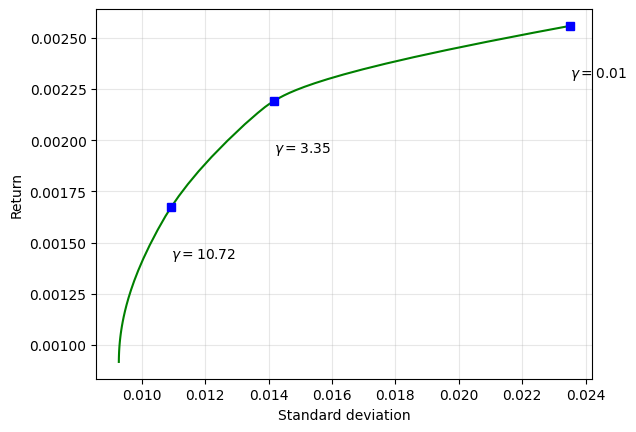

In [ ]:
# Initialize values
SAMPLES = 100   # number of gammas we will use
risk_data = np.zeros(SAMPLES)  # creating array of zeros
ret_data = np.zeros(SAMPLES)  # creating array of zeros
gamma_vals = np.logspace(-2,3, num = SAMPLES)  #creating a array of different gamma values

# Loop through different gamma values/samples
for i in range(SAMPLES):
  gamma.value = gamma_vals[i]
  prob.solve()
  risk_data[i] = cp.sqrt(risk).value  #square root of elements of covariance matrix
  ret_data[i] = ret.value   #expected return of stocks

# Plot the trade-off curve
markers_on = [1,50,60]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker], ret_data[marker]-.00025))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.grid(alpha=0.3)
plt.show()

## Conceptual Exercises

1. Why does the curve go to the bottom-left corner as we increase $\gamma$?




___

**Question 1 answer:** The standard deviation decreases as the variance (risk) decreases. As risk decreases, return also decreases. Lower risk --> lower reward
___

2. If our current (optimally constructed) portfolio has an expected standard deviation of 0.021, and we want to reduce the standard deviation to be 0.015, what is the expected *loss* in returns? A rough approximation is fine, this is just to get you familiar with interpreting the graph.



___

**Question 2 answer:** 0.00250-0.00225=0.00025

The expected loss in returns is 0.00025
___

3. Do you think that the expected return of the portfolio will continue to increase as $\gamma$ approaches zero, or do you think there would be an upper bound? What would this upper bound be?

___

**Question 3 answer:** The expected return of the portfolio will continue to increase as gamma approaches zero up until gamma is 0 where the risk portion of the objective function will be set to 0 and so the upper bound would be mu transposed * x which is just the total expected return with no risk (risk free rate)
___

## Coding Exercises

Now it's time for you to practice coding! Try coding up the following problem:

1. Suppose we want to build a portfolio where the **expected return is at least 0.001.**

Solve for the **portfolio with the lowest possible variance in this setting**.
  - What is the portfolio allocation vector, the expected return, and the variance?
  - How many stocks are you investing in?



In [ ]:
# Write your code here
# Hint: you can use np.round() and np.count_nonzero() functions.

x = cp.Variable(len(mu))
gamma = cp.Parameter(nonneg = True) # risk aversion param

# define obj function
ret = mu.T@x
risk = cp.quad_form(x, Sigma)
# minmize variance = minimize risk
obj = cp.Minimize(risk)

# constraints
const = []
const.append(cp.sum(x) == 1) # sum to 1
const.append(x >= 0) # positive x
const.append(ret >= 0.001) # return value constraints

# form LP
prob = cp.Problem(obj, const)
prob.solve()
x = x.value

print(x.round(4))
print(f"we're investing in {np.count_nonzero(x.round(4))} stocks")
print(f"The expected return of this portfolio is {ret.value}")
print(f"The variance of this portfolio is {risk.value}")

# --------------

[-0.     -0.      0.0711 -0.     -0.     -0.      0.      0.18   -0.
 -0.     -0.      0.      0.     -0.      0.1288  0.0798  0.     -0.
  0.      0.0037 -0.      0.0696 -0.     -0.      0.     -0.     -0.
  0.091   0.0194  0.3567]
we're investing in 9 stocks
The expected return of this portfolio is 0.001
The variance of this portfolio is 8.646485137471934e-05


2. Suppose we want to build a portfolio using ***only* stocks that have an expected return of at least 0.001**.
- Solve for the portfolio with the lowest possible variance in this setting.    
 - What is the portfolio allocation vector, the expected return, and the variance?
  - How many stocks are you investing in?



In [ ]:
# Write your code here
# Hint: you can use np.round() and np.count_nonzero() functions.

# DEFINE VARIABLES
# x is our decision variable (weights assigned to each stock in portfolio)
x = cp.Variable(len(mu))
# parameter (non-negative constant) for risk aversion
gamma = cp.Parameter(nonneg = True)

# OBJECTIVE FUNCTION
# dot product of mu (stock expected returns) and x (portfolio weights)
ret = mu.T@x # return
# quadratic form of x (portfolio weights) and Sigma (covariance matrix)
risk = cp.quad_form(x, Sigma)
# objective to minmize variance (to do this we minimize risk)
obj = cp.Minimize(risk)

# constraints
const = []
# entire budget is allocated
const.append(cp.sum(x) == 1) # sum to 1
const.append(x >= 0) # positive x
# creates a boolean variable where True means expected return > 0.001
filter = mu > 0.001
# ~ inverts the mask
# gets selected stocks w expected returns less than or equal to -0.001
# these selected stocks are ensured to be 0 so we only get > 0.001
const.append(x[~filter] == 0)

# form LP
# creates the optimization problem
prob = cp.Problem(obj, const)
# solves the problem
prob.solve()
# outputs!
x = x.value

print(x.round(4))
print(f"we're investing in {np.count_nonzero(x.round(4))} stocks")
print(f"The expected return of this portfolio is {ret.value}")
print(f"The variance of this portfolio is {risk.value}")

[-0.     -0.      0.2695 -0.     -0.     -0.     -0.     -0.     -0.
 -0.     -0.      0.0251 -0.     -0.     -0.      0.0961  0.0297 -0.
 -0.      0.2223 -0.      0.1093 -0.      0.      0.     -0.     -0.
  0.248  -0.     -0.    ]
we're investing in 7 stocks
The expected return of this portfolio is 0.0015591440171526317
The variance of this portfolio is 0.00014866491198839516


3. The variance of the first portfolio is lower (hence "better") than the second portfolio. Why do you think that is?

___

**Question 3 Answer:** The 2nd portfolio is a smaller set of stocks since we constrained our options to stocks with returns > 0.001. In the first portfolio there were more options for us to look at to find lower risk stocks. These lower risk stocks are generally the lower return stocks which we ignored in the 2nd portfolio due to our constraint of returns > 0.001.
___

In [ ]:
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(len(mu))  # portfolio allocation vector
gamma = cp.Parameter(nonneg=True)  # risk aversion parameter

# Objective: Maximize return while still considering risk (with lower weight)
ret = mu.T @ x  # portfolio return
risk = cp.quad_form(x, Sigma)  # portfolio risk / variance

# modify the objective to maximize return while considering a lower-weighted risk term
gamma.value = 0.1  # smaller value to prioritize return
obj = cp.Maximize(ret - gamma * risk)

# Define constraints
const = []
const.append(cp.sum(x) == 1)  # ensure the sum of portfolio weights is 1
const.append(x >= 0)  # ensure no short-selling (non-negative weights)

# Optional: add a constraint for a minimum expected return
target_return = 0.002  # set a higher target return threshold
const.append(ret >= target_return)

# Formulate the problem
prob = cp.Problem(obj, const)

# Solve the problem
prob.solve()

# Get optimized portfolio
x_optimal = x.value

# Output results
print(x_optimal.round(4))  # Display portfolio allocation
print(f"We're investing in {np.count_nonzero(x_optimal.round(4))} stocks")
print(f"The expected return of this portfolio is {ret.value}")
print(f"The variance of this portfolio is {risk.value}")


[ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
We're investing in 1 stocks
The expected return of this portfolio is 0.0025583514075785962
The variance of this portfolio is 0.0005521846938342086


The model is prioritizing maximizing return with only a small emphasis on minimizing risk (since gamma is set to a low value). This results in the optimizer selecting the stock with the highest expected return (at index 15) and ignoring other options.

Going forward we might increase gamma to encourage diversification of stock choices or add constraints to target more stocks.

# Reflection

In this lab, you learn how to model, code and solve optimization problems. A major assumption of this lab is that the parameters of the optimization problem are known. For example, we assumed that the expected return and covariance matrix of the stocks could be generated using historical estimates.

In real-world applications, you not only have to solve optimization problems, but you also have the estimate the parameters of your optimization problem. In one of the future labs we will cover a *predict-and-optimize* process, where we use machine learning techniques to predict parameters which we can then feed into an optimization model. This approach combines predictive and prescriptive analytics.